In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import plotly.express as px

In [3]:
from typing import List

In [4]:
import string

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize 

In [7]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

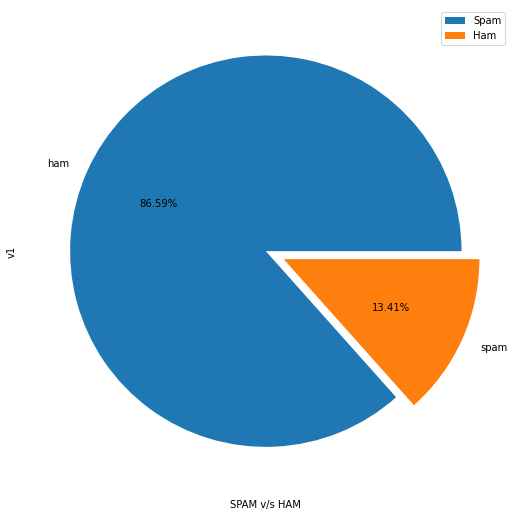

In [12]:
df["v1"].value_counts().plot(kind='pie', explode=[0,0.1], figsize=(9,9), autopct= '%1.2f%%')
plt.legend(['Spam','Ham'])
plt.xlabel('SPAM v/s HAM')
plt.show

In [13]:
fig = px.histogram(df, x="v1", color="v1", color_discrete_sequence=["#7FFF00","#00FFFF"])
fig.show()

In [14]:
df['lenght'] = df['v2'].apply(len)
df.head()

,v1,v2,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
fig = px.histogram(df, x="lenght", color="v1", color_discrete_sequence=["#00FF7F","#FFA500"] )
fig.show()

In [16]:
spam_msg=df[df['v1']=='spam']['v2']
ham_msg=df[df['v1']=='ham']['v2']
#to separate the spam & ham messages 
spam_msg.head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object

In [17]:
ham_msg.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object

In [18]:
def clear_text(text_arr: List[str]) -> List[str]:
    lines = []
    for text in text_arr:
        table = str.maketrans('', '', string.punctuation)
        line = text.translate(table)
        line = line.lower()
        lines.append(line)
    return lines

In [19]:
spam_words=[]
ham_words=[]
#making 2 empty lists for spam words & ham words 

def extractSpamwords(spam_msg):
    global spam_words                            
    words=[ word for word in word_tokenize(spam_msg)]
    spam_words= spam_words + words

def extractHamwords(ham_msg):
    global ham_words                 
    words=[ word for word in word_tokenize(ham_msg)]
    ham_words= ham_words + words    

p = spam_msg.apply(extractSpamwords)
q = ham_msg.apply(extractHamwords)

In [20]:
spam_words = clear_text(spam_words)
ham_words = clear_text(ham_words)

In [21]:
print(spam_words[:5], ham_words[:5])

['free', 'entry', 'in', '2', 'a'] ['go', 'until', 'jurong', 'point', '']


(-0.5, 599.5, 399.5, -0.5)

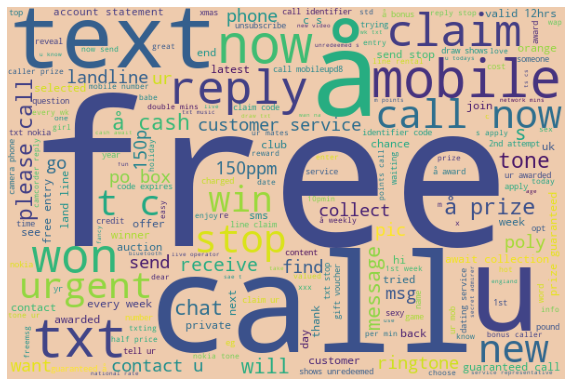

In [48]:
spam_wordcloud = WordCloud(background_color="#EECBAD", width=600, height=400).generate(" ".join(spam_words))
plt.figure(figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.axis('off')   

(-0.5, 599.5, 399.5, -0.5)

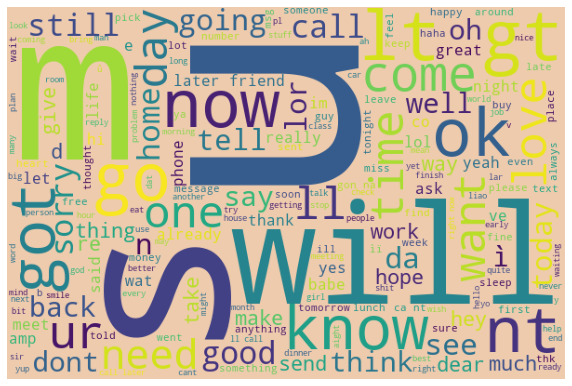

In [49]:
ham_wordcloud = WordCloud(background_color="#EECBAD", width=600, height=400).generate(" ".join(ham_words))
plt.figure(figsize=(10,8))
plt.imshow(ham_wordcloud)
plt.axis('off')   

In [24]:
y = df.v1
X = df.v2
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [25]:
y = pd.get_dummies(y, drop_first=True)
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


Spam = 1 and Ham = 0

In [26]:
X[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [27]:
X = clear_text(X)
X[:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though']

In [28]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [29]:
X.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Model Deployment

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9856502242152466

In [34]:
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred2 = tr.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9614349775784753

In [36]:
rr = RandomForestClassifier()
rr.fit(X_train, y_train)
y_pred3 = rr.predict(X_test)
accuracy_score(y_test, y_pred3)

0.9847533632286996

In [37]:
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Actual')

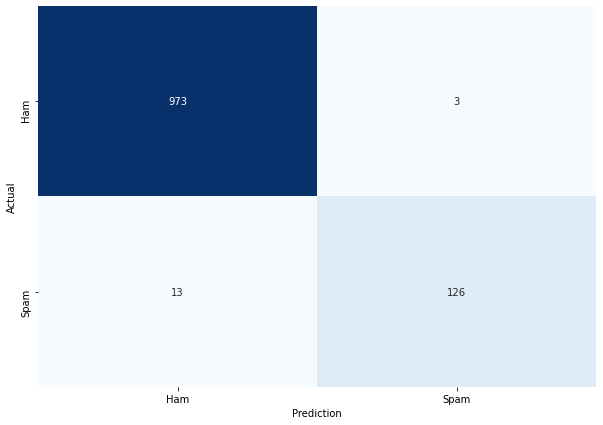

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='0', cbar=False, cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [39]:
lr.predict(X.toarray()[:3])

array([0, 0, 1], dtype=uint8)

Testing

In [40]:
#Spam = 1 and Ham = 0
def predict_spam(txt: str) -> bool:
    txt = clear_text([txt])
    txt = cv.transform(txt)
    pred = lr.predict(txt)
    return pred[0] == 1

In [41]:
predict_spam(df.v2[2])

True

In [42]:
text = "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/123345 to claim now."

In [43]:
predict_spam(text)

True

In [44]:
text = "Ann your free bitcoin account is waiting for you. Claim NOW and make up to AUD762 per day. Fully automated and designed for beginners."

In [45]:
predict_spam(text)

True

In [46]:
predict_spam('This is you captain speaking.')

False